<a href="https://colab.research.google.com/github/faridachettih/datascientest/blob/main/Exams/Exam02%20-%20Youtube%20videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement du Dataset

In [56]:
import pandas as pd

fileURL = "https://raw.githubusercontent.com/faridachettih/datascientest/main/Exams/data/youtube.csv"

# Charger sans index_col d'abord
df = pd.read_csv(fileURL, sep=',', on_bad_lines='skip')

# Afficher les premières lignes
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [58]:
# Sélectionner et renommer les colonnes nécessaires
df = df[[
    'video_id',
    'title',
    'publish_date',
    'channel_title',
    'category_id',
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'comments_disabled'
]].copy()

# Renommer les colonnes pour correspondre à la structure attendue
df = df.rename(columns={
    'publish_date': 'publishedAt',
    'channel_title': 'channelTitle',
    'category_id': 'categoryId',
    'views': 'view_count'
})

# Debut Exams

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   video_id           161470 non-null  object        
 1   title              161470 non-null  object        
 2   publishedAt        161470 non-null  datetime64[ns]
 3   channelTitle       161470 non-null  object        
 4   categoryId         161470 non-null  int64         
 5   view_count         161470 non-null  int64         
 6   likes              161470 non-null  int64         
 7   dislikes           161470 non-null  int64         
 8   comment_count      161470 non-null  int64         
 9   comments_disabled  161470 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(5), object(3)
memory usage: 11.2+ MB


In [64]:
# (h) Afficher le type de chaque colonne et le changer s'il y a des variables
# qui ne sont pas dans un format adapté.
df["publishedAt"] = pd.to_datetime(df["publishedAt"])

df.dtypes

,0
video_id,object
title,object
publishedAt,datetime64[ns]
channelTitle,object
categoryId,object
view_count,int64
likes,int64
dislikes,int64
comment_count,int64
comments_disabled,bool


In [16]:
# (i) Afficher le différentes modalités de la colonne "categoryId", ainsi que leur fréquence.

df['categoryId'].value_counts()

,count
categoryId,
24,42358
10,27903
22,15960
23,13401
25,11623
17,11210
26,10442
1,9139
20,5408


In [19]:
# (j) Créer un nouveau dataframe nommé df_filtre à partir de df en gardant uniquement les
# catégories Entertainment, Music, Gaming et Education. Afficher les (5) premières lignes.

df_filtre = df[df['categoryId'].isin([24, 10, 20, 27])]
df_filtre.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,13/11/2017,LastWeekTonight,24,2418783,97185,6146,12703,False
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,13/11/2017,Good Mythical Morning,24,343168,10172,666,2146,False
4,d380meD0W0M,I Dare You: GOING BALD!?,12/11/2017,nigahiga,24,2095731,132235,1989,17518,False
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,12/11/2017,Saturday Night Live,24,2103417,15993,2445,1970,False
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,13/11/2017,amc,24,104578,1576,303,1279,False


In [65]:
# (k) Dans ce nouveau dataframe remplacer les nombres présents sur "categoryId" avec le nom de la catégorie correspondante
df_filtre.loc[df_filtre['categoryId'] == 24, 'categoryId'] = 'Entertainment'
df_filtre.loc[df_filtre['categoryId'] == 10, 'categoryId'] = 'Music'
df_filtre.loc[df_filtre['categoryId'] == 20, 'categoryId'] = 'Gaming'
df_filtre.loc[df_filtre['categoryId'] == 27, 'categoryId'] = 'Education'

df_filtre


,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,month
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,1970-01-01 00:00:00.000000011,LastWeekTonight,NaN,2418783,97185,6146,12703,False,1
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,1970-01-01 00:00:00.000000011,Good Mythical Morning,NaN,343168,10172,666,2146,False,1
4,d380meD0W0M,I Dare You: GOING BALD!?,1970-01-01 00:00:00.000000011,nigahiga,NaN,2095731,132235,1989,17518,False,1
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,1970-01-01 00:00:00.000000011,Saturday Night Live,NaN,2103417,15993,2445,1970,False,1
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,1970-01-01 00:00:00.000000011,amc,NaN,104578,1576,303,1279,False,1
...,...,...,...,...,...,...,...,...,...,...,...
161464,7E1np354AEc,Ð’ÐµÑ‡ÐµÑ€ Ñ Ð’Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€Ð¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²Ñ...,1970-01-01 00:00:00.000000006,Ð Ð¾ÑÑÐ¸Ñ 24,NaN,201847,1568,407,537,False,1
161465,sGolxsMSGfQ,HOW2: How to Solve a Mystery,1970-01-01 00:00:00.000000006,Annoying Orange,NaN,80685,1701,99,1312,False,1
161466,8HNuRNi8t70,Eli Lik Lik Episode 13 Partie 01,1970-01-01 00:00:00.000000006,Elhiwar Ettounsi,NaN,103339,460,66,51,False,1
161467,GWlKEM3m2EE,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,1970-01-01 00:00:00.000000006,Kingdom Hearts,NaN,773347,25900,224,3881,False,1


In [27]:
# (l) En regroupant les données, on peut afficher l'évolution du nombre moyen de likes en fonction de la date d'apparition de la vidéo
# (avec une fréquence mensuelle) et en distinguant la catégorie de la vidéo. Exécutez la cellule ci-dessous et commenter le résultat.
On observe des variations dans le temps du nombre moyen de likes selon les catégories.

Certaines catégories ont une moyenne systématiquement plus élevée (courbe au-dessus).

Les pics peuvent venir de vidéos virales dans un mois donné (la moyenne monte fortement).

Si les courbes sont proches → catégories proches en engagement ; si elles sont très séparées → catégories différentes en engagement.

SyntaxError: invalid character '→' (U+2192) (ipython-input-4105357927.py, line 9)

In [29]:
# (m)
# conversion de publishedAt en date pour extraire le mois
df_filtre['publishedAt'] = pd.to_datetime(df_filtre['publishedAt'])
#création de la colonne en month
df_filtre['month'] = df_filtre['publishedAt'].dt.month
df_filtre

,video_id,title,publishedAt,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,month
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,1970-01-01 00:00:00.000000011,LastWeekTonight,NaN,2418783,97185,6146,12703,False,1
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,1970-01-01 00:00:00.000000011,Good Mythical Morning,NaN,343168,10172,666,2146,False,1
4,d380meD0W0M,I Dare You: GOING BALD!?,1970-01-01 00:00:00.000000011,nigahiga,NaN,2095731,132235,1989,17518,False,1
6,39idVpFF7NQ,Roy Moore & Jeff Sessions Cold Open - SNL,1970-01-01 00:00:00.000000011,Saturday Night Live,NaN,2103417,15993,2445,1970,False,1
11,VifQlJit6A0,(SPOILERS) 'Shiva Saves the Day' Talked About ...,1970-01-01 00:00:00.000000011,amc,NaN,104578,1576,303,1279,False,1
...,...,...,...,...,...,...,...,...,...,...,...
161464,7E1np354AEc,Ð’ÐµÑ‡ÐµÑ€ Ñ Ð’Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€Ð¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²Ñ...,1970-01-01 00:00:00.000000006,Ð Ð¾ÑÑÐ¸Ñ 24,NaN,201847,1568,407,537,False,1
161465,sGolxsMSGfQ,HOW2: How to Solve a Mystery,1970-01-01 00:00:00.000000006,Annoying Orange,NaN,80685,1701,99,1312,False,1
161466,8HNuRNi8t70,Eli Lik Lik Episode 13 Partie 01,1970-01-01 00:00:00.000000006,Elhiwar Ettounsi,NaN,103339,460,66,51,False,1
161467,GWlKEM3m2EE,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,1970-01-01 00:00:00.000000006,Kingdom Hearts,NaN,773347,25900,224,3881,False,1


In [ ]:
# (n) Grâce au résultat précédent et à la cellule suivante que vous exécuterez, peut-on conclure quant à une hiérarchie
# entre la catégorie et le nombre d'apparitions de la vidéo au fil du temps (en fonction du mois)?
Le code fourni trace le nombre de vidéos par mois et par catégorie.

👉 Commentaire/conclusion type :

Une hiérarchie existe si une catégorie est presque toujours au-dessus des autres courbes (plus de vidéos publiées chaque mois).

Si les courbes se croisent souvent → hiérarchie pas stable (ça dépend des mois).

Si une catégorie est toujours en bas → c’est la moins fréquente sur la période.

In [31]:
# (o) Afficher les indicateurs de position et de dispersion (les plus usuels) de la variable "likes" du df.
df['likes'].describe()

,likes
count,1.614700e+05
mean,6.566194e+04
std,2.260617e+05
min,0.000000e+00
25%,1.975000e+03
50%,9.840000e+03
75%,4.006275e+04
max,5.613827e+06


In [39]:
# (p) Trouver la vidéo qui a eu le nombre maximal de likes.
df.loc[df["likes"].idxmax()]


,38273
video_id,7C2z4GqqS5E
title,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV
publishedAt,18/05/2018
channelTitle,ibighit
categoryId,10
view_count,123010920
likes,5613827
dislikes,206892
comment_count,1228655
comments_disabled,False


In [40]:
# (q) À partir de df créer un dataframe df_num qui contient uniquement les colonnes avec des données numériques et afficher les (5) premières lignes.
#le dataframe contenant uniquement les variables numériques est créé à l’aide de la fonction select_dtypes
df_num = df.select_dtypes(include='number')
df_num.head(5)

,categoryId,view_count,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [41]:
# (r) Calculer les coefficients de corrélation entre les différentes colonnes.
#on calcule la corrélation de Pearson entre toutes les variables numériques
df_num.corr()

,categoryId,view_count,likes,dislikes,comment_count
categoryId,1.000000,-0.161403,-0.179315,-0.037333,-0.078428
view_count,-0.161403,1.000000,0.786897,0.414189,0.499026
likes,-0.179315,0.786897,1.000000,0.453304,0.776422
dislikes,-0.037333,0.414189,0.453304,1.000000,0.732969
comment_count,-0.078428,0.499026,0.776422,0.732969,1.000000


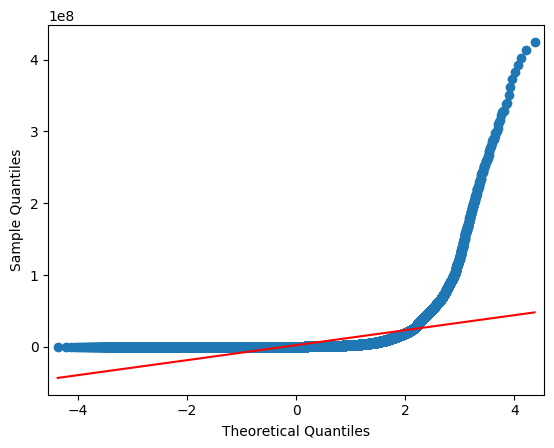

In [48]:
# (s) Les données présentes dans la variable view_count semblent-elles normales ?
#Nous allons utiliser le QQ-plot de la librairie statsmodels.api pour répondre à notre question
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df_num["view_count"], line="s")
plt.show()
#Le QQ-plot de la variable view_count, réalisé à l’aide du module statsmodels.api, montre des écarts importants par rapport à la droite théorique d’une loi normale, notamment dans les queues de distribution. On peut donc conclure que la variable view_count ne suit pas une loi normale.



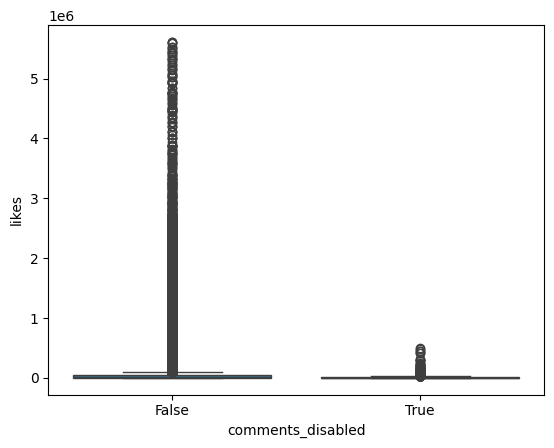

In [51]:
# (t) On voudrait savoir si le fait de désactiver les commentaires sur youtube a une influence sur les nombre de likes.
# Proposer une démarche scientifique, décrire les étapes et appliquer la méthode spécifique utilisé, puis conclure.

# on sépare en deux group
likes_comments_on = df[df["comments_disabled"] == False]["likes"]
likes_comments_off = df[df["comments_disabled"] == True]["likes"]

#ensuite on compare les statistiques descriptives
likes_comments_on.describe(), likes_comments_off.describe()

# et ensuite on visualise avec boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="comments_disabled",y="likes",data=df)
plt.show()
